#SVM Classification For Hand Written Digits

In [1]:
#import package to handle maths and arrays
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# importing a module for splitting a dataset into train, and test
from sklearn.model_selection import train_test_split
# import SVM classifier
from sklearn import svm
# confusion metric
from sklearn import metrics
import seaborn as sns

##Mounting the google drive to Access Data

In [2]:
#mount the google drive to access the data 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#change the directory to the folder with the data
%cd /content/gdrive/MyDrive/Deep_learning/Assignment_1

/content/gdrive/MyDrive/Deep_learning/Assignment_1


##Importing and Loading The Data

In [4]:
#import the data and download it into your directory
#if this has been ran before select n to not overide the data
!curl -O 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
!gunzip t*-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  55.2M      0 --:--:-- --:--:-- --:--:-- 55.2M
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [5]:
#split the data into train data, labels for training data, testing data and labels for testing data
from mlxtend.data import loadlocal_mnist
import platform

if not platform.system() == 'Windows':
    X_train, X_labels = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')

else:
    X_train, X_labels = loadlocal_mnist(
            images_path='train-images.idx3-ubyte', 
            labels_path='train-labels.idx1-ubyte')

if not platform.system() == 'Windows':
    Y_test, Y_labels = loadlocal_mnist(
            images_path='t10k-images-idx3-ubyte', 
            labels_path='t10k-labels-idx1-ubyte')

else:
    Y_test, Y_labels = loadlocal_mnist(
            images_path='t10k-images-idx3-ubyte', 
            labels_path='t10k-labels-idx1-ubyte')

In [6]:
#check the dimensions of the data to ensure they have been correctly split and assigned to an array
print('Dimensions: %s x %s' % (X_train.shape[0], X_train.shape[1]))
print('\n1st row', X_train[0])

Dimensions: 60000 x 784

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 1

In [7]:
#print and save the labels into into X_labels for the training data
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(X_labels))
print('Class distribution: %s' % np.bincount(X_labels))
#check the shape of the training and testing data to ensure the splitting of data was done correctly
print(np.shape(X_train))
print(np.shape(Y_test))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
(60000, 784)
(10000, 784)


##Initial Reshaping

In [8]:
#reshape the raw data into a 28x28 array of pixels
#this is needed for data visualization
X_train=X_train.reshape(-1,28,28)
Y_test=Y_test.reshape(-1,28,28)
print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(Y_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


##Visualizing The Data

5
0
4
8
2
9
7
1
3
6


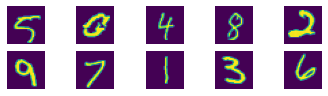

In [9]:
#Display samples of the training data with its correlating labels
#using plt.figure to plot the images in a 5x5 block
img_index = 610
fig = plt.figure()
ax1 = fig.add_subplot(5,5,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(5,5,2)
ax2.axis('off')
img_index = 1501
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(5,5,3)
ax2.axis('off')
img_index = 26000
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(5,5,4)
ax2.axis('off')
img_index = 38000
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(5,5,5)
ax2.axis('off')
img_index = 1010
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(5,5,6)
ax2.axis('off')
img_index = 20001
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(5,5,7)
ax2.axis('off')
img_index = 30001
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(5,5,8)
ax2.axis('off')
img_index = 1002
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(5,5,9)
ax2.axis('off')
img_index = 20003
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(5,5,10)
ax2.axis('off')
img_index = 30004
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

##Histogram-of-Oriented Gradient (HOG) feature extraction

In [10]:
#import skimage to use feature extraction
from skimage import feature
#initialise the lists needed to store the HOG feature data
hog_train_data = []
hog_train_labels = []
hog_test_data = []
hog_test_labels = []
hog_images_train = []
hog_images_test = []

In [11]:
for img_index in range(len(X_train)):
  # load the image, and extract HOG features it
  image = X_train[img_index]
  
  # use orientation =9, pixel_per_cell=(10,10), cells_per_block=2,2, 
  # transform_sqrt=True and block_norm="L2-Hys"
  hog, hog_image = feature.hog(image, orientations= 9, pixels_per_cell=(10,10), cells_per_block=(2,2), visualize=True, transform_sqrt=True, block_norm = 'L2-Hys')
 
  # update the data and labels
  hog_train_data.append(hog) 
  hog_train_labels.append(X_labels[img_index])
  hog_images_train.append(hog_image)  

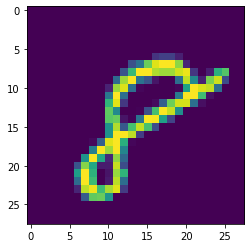

In [12]:
#show a sample of the data before HOG extraction
plt.imshow(X_train[img_index])

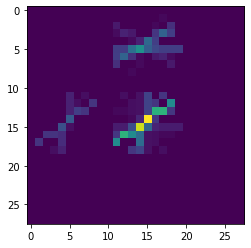

In [13]:
#show a the same data sample after it has undergone feature extraction
plt.imshow(hog_images_train[img_index])

In [14]:
#do the same feature extraction for the testing data
for img_index_2 in range(len(Y_test)):
  # load the image, and extract HOG features it
  image = Y_test[img_index_2] 
  
  # transform_sqrt=True and block_norm="L2-Hys"
  hog, hog_image_test = feature.hog(image, orientations= 9, pixels_per_cell=(10,10), cells_per_block=(2,2), visualize=True, transform_sqrt=True, block_norm = 'L2-Hys') 
  # update the data and labels
  hog_test_data.append(hog) 
  hog_test_labels.append(Y_labels[img_index_2])  
  hog_images_test.append(hog_image_test) 

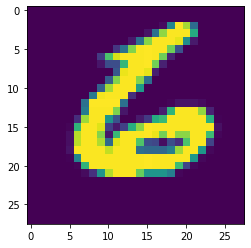

In [15]:
#show a sample of the data before HOG extraction
plt.imshow(Y_test[img_index_2])

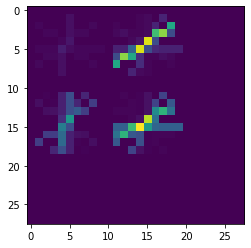

In [16]:
#show the same data sample after it has undergone feature extraction
plt.imshow(hog_images_test[img_index_2])

In [17]:
#Check how the HOG feature extraction changed the shape of the data
print(np.shape(hog_train_data))
print(np.shape(hog_train_labels))
print(np.shape(hog_test_data))
print(np.shape(hog_test_labels))

(60000, 36)
(60000,)
(10000, 36)
(10000,)


##Reshaping Data For SVM

In [18]:
#reshape the data so it can be correctly inputted into the KNN
#change the 28x28 array into a 784 1D vector
X_train= np.reshape(X_train, (X_train.shape[0], -1))
Y_test = np.reshape(Y_test, (Y_test.shape[0], -1))

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(Y_test)))

Train dataset after reshaping:(60000, 784)
Test dataset after reshaping :(10000, 784)


##Creating the SVM For Raw Data

In [20]:
#Desing a SVM classifier with a kernel 'rbf' a C of 150 and a random state of 54
model =  svm.SVC(kernel='rbf', C = 150, random_state = 54)

In [21]:
#fit the raw training data to the model
model.fit(X_train, X_labels)

SVC(C=150, random_state=54)

In [22]:
#calculate the accuracy of the SVM on the raw training data
acc_train = model.score(X_train,X_labels)
print('Train set accuracy: ', acc_train)

Train set accuracy:  1.0


In [23]:
#calculate the accuracy of the SVM on the raw testing data
acc_test = model.score(Y_test,Y_labels)
print('Test set accuracy: ', acc_test)

Test set accuracy:  0.9833


##Creating the SVM For HOG Data

In [24]:
#design another model for the HOG data using the same parameters
model2 =  svm.SVC(kernel='rbf', C = 150, random_state = 54)

In [25]:
#fit the raw training data to the model
model2.fit(hog_train_data, hog_train_labels)

SVC(C=150, random_state=54)

In [26]:
#calculate the accuracy of the SVM on the HOG training data
acc_train_2 = model2.score(hog_train_data, hog_train_labels)
print('Train set accuracy: ', acc_train_2)

Train set accuracy:  0.9970333333333333


In [27]:
#calculate the accuracy of the SVM on the HOG testing data
acc_test_2 = model2.score(hog_test_data,hog_test_labels)
print('Test set accuracy: ', acc_test_2)

Test set accuracy:  0.9068


##Evaluation of Model

In [28]:
#Method that takes in the test data and returns the labels predicted by the model
#The labels are stored in pred
pred = model.predict(Y_test)

##Confusion Matrix For Raw Data

In [29]:
#Create a confusion matrix taking in the true labels "Y_labels" and comparing them agains the predicted labels "pred"
cm  = metrics.confusion_matrix(Y_labels, pred)
print(cm)

[[ 973    0    2    0    0    2    0    1    2    0]
 [   0 1129    2    1    0    1    0    1    1    0]
 [   5    1 1014    0    1    0    1    6    4    0]
 [   0    0    2  995    0    2    0    4    4    3]
 [   0    0    4    0  967    0    2    0    0    9]
 [   2    0    0    9    1  872    3    0    3    2]
 [   5    2    0    0    2    3  945    0    1    0]
 [   0    5    9    2    1    0    0 1005    0    6]
 [   3    0    2    4    3    1    1    2  954    4]
 [   1    5    0    7    9    3    1    4    0  979]]


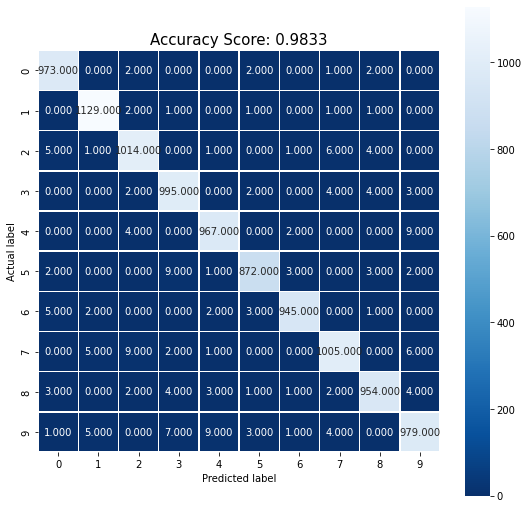

In [30]:
#Using sns to make the confusion matrix more visibly pleasing
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_test)
plt.title(all_sample_title, size = 15);

##Confusion Matrix For HOG Data

In [31]:
#calculate the predicted labels for the HOG data
pred_Hog = model2.predict(hog_test_data)

In [32]:
#Create a confusion matrix taking in the true labels "hog_test_labels" and comparing them agains the predicted labels "pred"
cm_Hog  = metrics.confusion_matrix(hog_test_labels, pred_Hog)
print(cm_Hog)

[[ 923    5    5    2    1    3   19    1   16    5]
 [   6 1118    3    2    0    0    4    1    1    0]
 [   7    3  922   42    3    0    1   33   18    3]
 [   2    1   39  887    1   30    0   21   23    6]
 [   3    3    5    1  914    2   36    4    6    8]
 [   5    2    6   31    5  803   10    4   17    9]
 [  18    3    3    0   35   12  876    0    8    3]
 [   2    8   43   37    1    5    0  919    2   11]
 [  34    1   20   30    7   25   15    2  802   38]
 [  11    7    6   11   11   14    2   13   30  904]]


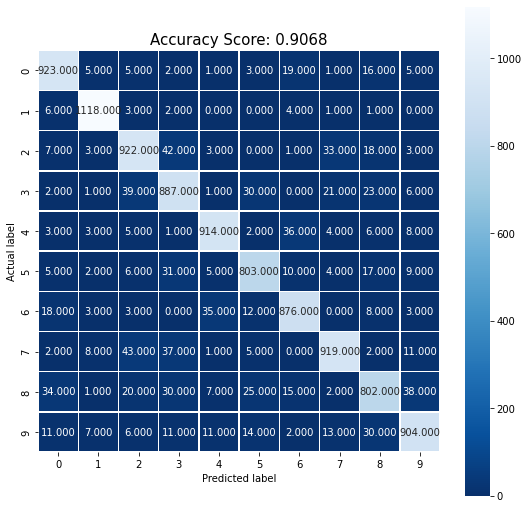

In [33]:
#Using sns to make the confusion matrix more visibly pleasing
plt.figure(figsize=(9,9))
sns.heatmap(cm_Hog, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_test_2)
plt.title(all_sample_title, size = 15);

##Displaying Classification Results

###Results For Raw Data

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)
2
1
0
4


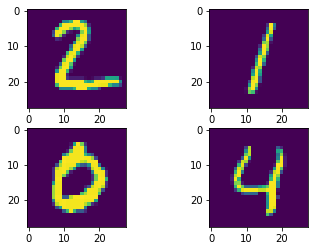

In [34]:
#Reshape the data for visualization
X_train=X_train.reshape(-1,28,28)
Y_test=Y_test.reshape(-1,28,28)
print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(Y_test)))

#Display sample images of the raw data and the predicted labels to test whether the model
#correctly predicted the hand written digits from the raw data
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(Y_test[1])
print(pred[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(Y_test[2])
print(pred[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(Y_test[3])
print(pred[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(Y_test[4])
print(pred[4])

###Results For HOG Data

2
1
8
4


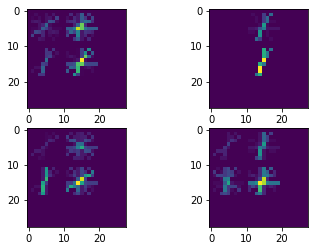

In [35]:
#Display sample images of the HOG data and the predicted labels to test whether the model
#correctly predicted the hand written digits from the HOG data
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(hog_images_test[1])
print(pred_Hog[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(hog_images_test[2])
print(pred_Hog[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(hog_images_test[3])
print(pred_Hog[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(hog_images_test[4])
print(pred_Hog[4])